In [20]:
import tensorflow as tf
source = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz'
model_dir = tf.keras.utils.get_file(fname='ssd_mobilenet_v2_320x320_coco17_tpu-8',origin = source, untar=True,cache_dir = './235-SSD/model_1')

In [21]:
model = tf.saved_model.load(model_dir+'/saved_model')

In [22]:
signature = model.signatures['serving_default']

In [23]:
import numpy as np
import cv2
# Load an image from a file
image = cv2.imread('Screenshot 2023-03-10 190018.jpg')

# Convert the image from BGR to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_untouched = image.copy()

# Resize the image to 320x320 pixels
image = cv2.resize(image, (320, 320))

# Convert the image to a float32 tensor
image = tf.convert_to_tensor(image, dtype=tf.uint8)

# Add a batch dimension to the tensor
image = tf.expand_dims(image, axis=0)

output_tensor = signature(image)


In [24]:
import matplotlib.pyplot as plt
box = output_tensor['detection_boxes']
classes = output_tensor['detection_classes']
scores = output_tensor['detection_scores']
num_detections = output_tensor['num_detections']
import re

# Open the label map file and read its contents
with open('mscoco_label_map.pbtxt', 'r') as f:
    label_map_data = f.read()

# Define a regular expression pattern to extract item entries
item_pattern = re.compile(r'item\s*\{(.*?)\}', re.DOTALL)

# Find all item entries in the label map data
items = item_pattern.findall(label_map_data)

# Create a dictionary to map class ids to display names
id_to_display_name = {}

# Iterate over all item entries
for item in items:
    # Extract the id and display_name fields from the item entry
    id_match = re.search(r'id\s*:\s*(\d+)', item)
    display_name_match = re.search(r'display_name\s*:\s*"(.+?)"', item)

    if id_match and display_name_match:
        # Get the id and display_name values
        id_value = int(id_match.group(1))
        display_name_value = display_name_match.group(1)

        # Add an entry to the dictionary mapping the id to the display name
        id_to_display_name[id_value] = display_name_value

# Get the display name for a specific class id
class_id = 1  # Example class id
display_name = id_to_display_name[class_id]
print(display_name)


    
    




person


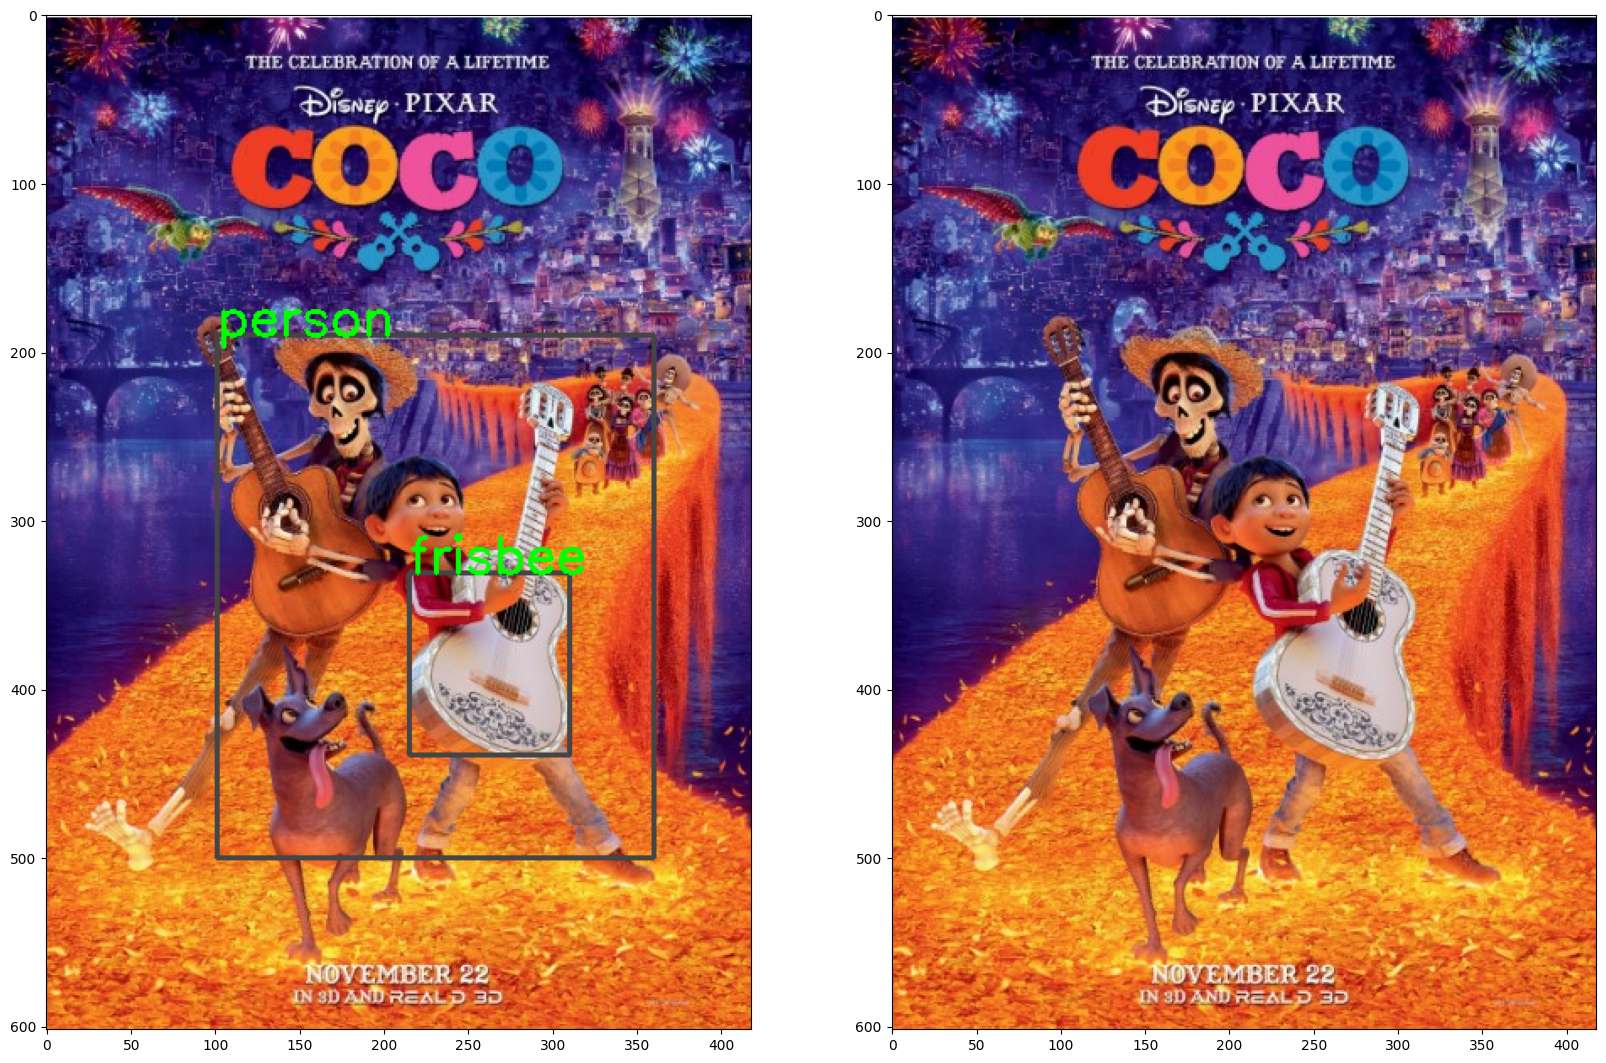

In [25]:
image = cv2.imread('Screenshot 2023-03-10 190018.jpg')
confidence_threshold = 0.7
for i in range(int(num_detections[0])):
    if scores[0][i] > confidence_threshold:
        boxes = box[0][i]
        x1 = int(boxes[1] * image.shape[1])
        y1 = int(boxes[0] * image.shape[0])
        x2 = int(boxes[3] * image.shape[1])
        y2 = int(boxes[2] * image.shape[0])
        class_id = int(classes[0][i])
        display_name = id_to_display_name.get(class_id, f'Label unavailable, class number: {class_id}')
        cv2.rectangle(image, (x1, y1), (x2, y2), (69, 69, 69), 2)
        cv2.putText(image, display_name, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
fig, axs = plt.subplots(1, 2,figsize=(20, 20))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].imshow(image_untouched)
plt.show()
